### Chapter 01. 대중교통 데이터 시각화하기

> #### 유임승차 비율이 가장 높은 역은 어디일까?

In [19]:
import csv

f = open('subwayfee.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)

max_rate = 0
for row in data:
    for j in range(4, 8, 1):
        row[j] = int(row[j].replace(',', ''))  # 분석을 위해 정수형으로 바꾸고 ,를 공백으로 대체

    # 유임승차 비율이 가장 많은 지하철 역은 어디인가?
    if row[6] != 0:
        rate = row[4] / row[6]
        if rate > max_rate:
            max_rate = rate
            print(row, round(max_rate, 2)) # 소수점 2번째 자리까지 반올림
            # 소수점 올림: ceil() --> math import 해야함
            # 소수점 반올림: round() --> 파이썬 내장함수라 바로 사용 가능
            # 소수점 버림: floor() --> math import 해야함

    #if row[6] == 0:
    #    print(row)
f.close()

['2022-08', '1호선', '0150', '서울역', 1167657, 1130901, 180626, 172177] 6.46
['2022-08', '2호선', '0201', '시청', 568964, 547537, 51980, 47237] 10.95
['2022-08', '2호선', '0202', '을지로입구', 1030364, 1059452, 91971, 85574] 11.2
['2022-08', '2호선', '0209', '한양대', 177378, 188876, 11994, 12537] 14.79
['2022-08', '2호선', '0239', '홍대입구', 1717050, 1851268, 90063, 86905] 19.06
['2022-08', '6호선', '2615', '연신내', 52, 0, 2, 0] 26.0


    rate의 정의를 유임승차 / 무임승차로 정의할 경우 원하는 통계값을 얻을 수 없음

#### ✅ 유임 + 무임승차 인원을 합해서 100,000명 이상인 경우로만 한정
    rate = 유임 승차 인원 / 전체 (유임 + 무임승차) 인원

In [7]:
print(header)
print(row)

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2022-08', '경원선', '1022', '창동', 10, 0, 0, 0]


In [20]:
import csv

f = open('subwayfee.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)

max_rate = 0
for row in data:
    for j in range(4, 8, 1):
        row[j] = int(row[j].replace(',', ''))  # 분석을 위해 정수형으로 바꾸고 ,를 공백으로 대체

    # row[4] <-- 유임승차 인원수
    # row[6] <-- 무임승차 인원수
    if row[6] != 0 and (row[4] + row[6]) > 100000:
        rate = row[4] / (row[4] + row[6]) # New 유임승차 비율 계산
        
        if rate > max_rate:
            max_rate = rate
            print(row, round(max_rate, 2)) # 소수점 2번째 자리까지 반올림
            
f.close()

['2022-08', '1호선', '0150', '서울역', 1167657, 1130901, 180626, 172177] 0.87
['2022-08', '2호선', '0201', '시청', 568964, 547537, 51980, 47237] 0.92
['2022-08', '2호선', '0202', '을지로입구', 1030364, 1059452, 91971, 85574] 0.92
['2022-08', '2호선', '0209', '한양대', 177378, 188876, 11994, 12537] 0.94
['2022-08', '2호선', '0239', '홍대입구', 1717050, 1851268, 90063, 86905] 0.95
['2022-08', '공항철도 1호선', '4203', '홍대입구', 334381, 344582, 17164, 16166] 0.95


> #### 유임승차 비율이 높은 다른 역들도 살펴보기

In [21]:
import csv

f = open('subwayfee.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)

max_rate = 0
for row in data:
    for j in range(4, 8, 1):
        row[j] = int(row[j].replace(',', ''))  # 분석을 위해 정수형으로 바꾸고 ,를 공백으로 대체

    # row[4] <-- 유임승차 인원수
    # row[6] <-- 무임승차 인원수
    if row[6] != 0 and (row[4] + row[6]) > 100000:
        rate = row[4] / (row[4] + row[6]) # New 유임승차 비율 계산
        
        if rate > 0.92:
            print(row, round(rate, 2)) # 소수점 2번째 자리까지 반올림
            
f.close()

['2022-08', '2호선', '0209', '한양대', 177378, 188876, 11994, 12537] 0.94
['2022-08', '2호선', '0219', '삼성(무역센터)', 1360753, 1373810, 111605, 103224] 0.92
['2022-08', '2호선', '0222', '강남', 2073808, 2018576, 146482, 127762] 0.93
['2022-08', '2호선', '0238', '합정', 841083, 921865, 62256, 62839] 0.93
['2022-08', '2호선', '0239', '홍대입구', 1717050, 1851268, 90063, 86905] 0.95
['2022-08', '3호선', '0327', '신사', 728935, 769927, 62606, 61011] 0.92
['2022-08', '경부선', '1001', '서울역', 246839, 70773, 13293, 2816] 0.95
['2022-08', '경부선', '1702', '가산디지털단지', 410976, 487813, 32364, 35714] 0.93
['2022-08', '분당선', '1848', '압구정로데오', 502688, 575961, 43710, 41839] 0.92
['2022-08', '5호선', '2527', '여의도', 710781, 755045, 50386, 47769] 0.93
['2022-08', '5호선', '2528', '여의나루', 333874, 381345, 28279, 27372] 0.92
['2022-08', '6호선', '2624', '상수', 241040, 285596, 20003, 20534] 0.92
['2022-08', '6호선', '2632', '한강진', 224575, 266059, 14949, 14544] 0.94
['2022-08', '7호선', '2748', '가산디지털단지', 1011630, 1004540, 80508, 75856] 0.93
['2022-08'

> #### 유무임 승하차 인원이 가장 많은 역은 어디일까?

In [24]:
# 초기화된 list를 얻는 방법 1)
max_people = [0,0,0,0]
print(max_people)

# 초기화된 list를 얻는 방법 2)
max_people = [0] * 4
print(max_people)

# 초기화된 list를 얻는 방법 3)
max_people = []
for i in range(4):
    max_people.append(0)
print(max_people)

[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]


In [25]:
# 초기화된 list를 얻는 방법 1)
max_station = ['','','','']

# 초기화된 list를 얻는 방법 2)
max_station = [''] * 4

# 초기화된 list를 얻는 방법 3)
max_station = []
for i in range(4):
    max_station.append('')

In [29]:
import csv

f = open('subwayfee.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)

max_station = [''] * 4
max_people = [0] * 4

for row in data:
    # row[4] <-- 유임승차 인원수
    # row[5] <-- 유임하차 인원수
    # row[6] <-- 무임승차 인원수
    # row[7] <-- 무임하차 인원수
    for j in range(4, 8, 1):
        row[j] = int(row[j].replace(',', ''))  # 분석을 위해 정수형으로 바꾸고 ,를 공백으로 대체
        
        if row[j] > max_people[j - 4]:
            max_people[j - 4] = row[j]
            max_station[j - 4] = row[3] + ' ' + row[1] # 지하철 역 이름 + 호선명
            
f.close()
label = ["(유임승차)", "(유임하차)", "(무임승차)", "(무임하차)"]

for i in range(0,4,1):
    print(label[i], max_station[i], ":", max_people[i], "명")

(유임승차) 강남 2호선 : 2073808 명
(유임하차) 강남 2호선 : 2018576 명
(무임승차) 종로3가 1호선 : 277589 명
(무임하차) 제기동 1호선 : 282283 명


> #### 시각화해보기

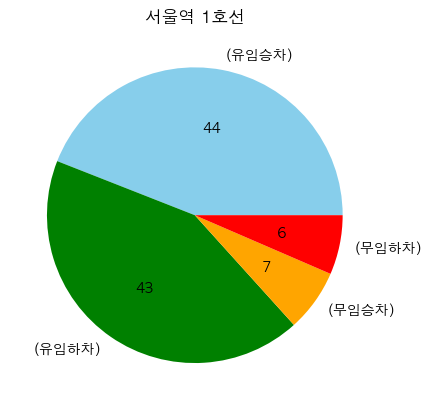

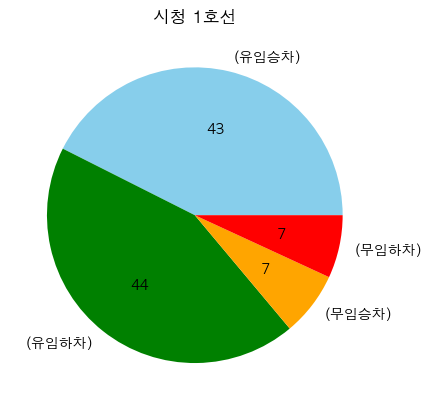

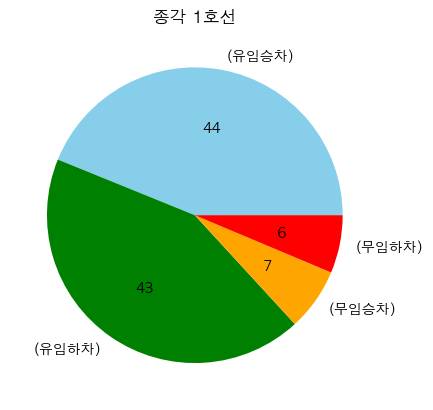

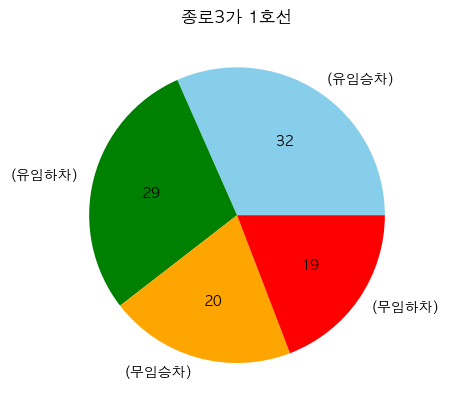

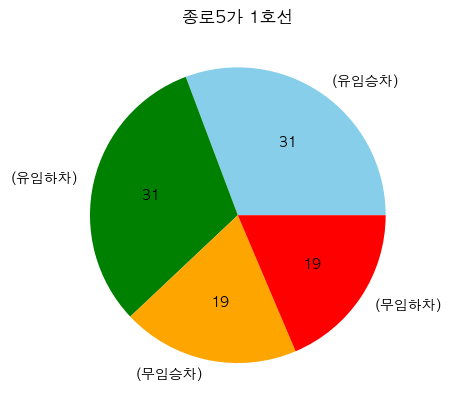

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [45]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)

max_station = [''] * 4
max_people = [0] * 4

color = ["skyblue", "green", "orange", "red"]
plt.rc('font', family='AppleGothic')
#plt.rc("font", family="Malgun Gothic") # window용

for row in data:
    # row[4] <-- 유임승차 인원수
    # row[5] <-- 유임하차 인원수
    # row[6] <-- 무임승차 인원수
    # row[7] <-- 무임하차 인원수
    for j in range(4, 8, 1):
        row[j] = int(row[j].replace(',', ''))  # 분석을 위해 정수형으로 바꾸고 ,를 공백으로 대체
    
    
    plt.figure()
    plt.title(row[3] + ' ' + row[1]) # 지하철 역 이름 + 호선명 
    plt.pie(row[4:8], labels=label, colors=color, autopct='%.f')
    plt.savefig(row[3] + ' ' + row[1] + ".png") # ✅ save figure (시각화 자료 저장)
    plt.show()
        
f.close()